# DIABETC PATIENTS PROJECT
## ABOUT 
This project is originally from the National Institute of Diabetes and Digestive
and Kidney Diseases. The objective of the project is to diagnostically predict
whether a patient has diabetes based on certain diagnostic measurements
included in the dataset. Several constraints were placed on the selection of
these instances from a larger database. In particular, all patients here are
females at least 21 years old of Pima Indian heritage.
## COLUMN DESCRIPTION FOR DIABETES DATASETS:
• Pregnancies
• Glucose
• Blood Pressure
• Skin Thickness
• Insulin
• BMI
• Diabetes
• Age
• Outcome

From the data set in the (.csv) File We can find several variables, some of
them are independent (several medical predictor variables) and only one target
dependent variable (Outcome).

# Hypothesis Statement and questions
### hypothesis
Null Hypothesis (H0): There is no significant relationship between age and the likelihood of having diabetes.

Alternative Hypothesis (H1): There is a significant relationship between age and the likelihood of having diabetes

### Questions
1.How does the prevalence of diabetes vary across different age groups?

2.Is there a positive or negative correlation between age and the probability of having diabetes?

3.Does the relationship between age and diabetes remain consistent after controlling for other factors like BMI, glucose levels, and family history?

4.Are there any other factors, such as age, BMI, or insulin levels, that might influence the relationship between glucose levels and diabetes status?

5.What is the distribution of glucose levels among individuals with and without diabetes?

In [28]:
#Import dependencies
#for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import pingouin as pg
from scipy.stats import gaussian_kde
#for model creation
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [3]:
#Import data into the notebook file
df_diabetes=pd.read_csv('../Assets/diabetes.csv')

In [4]:
#view top ten rows of the data
df_diabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [5]:
#check for missing values
df_diabetes.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Exploratory Data Analysis(EDA)
## Multivariate analysis

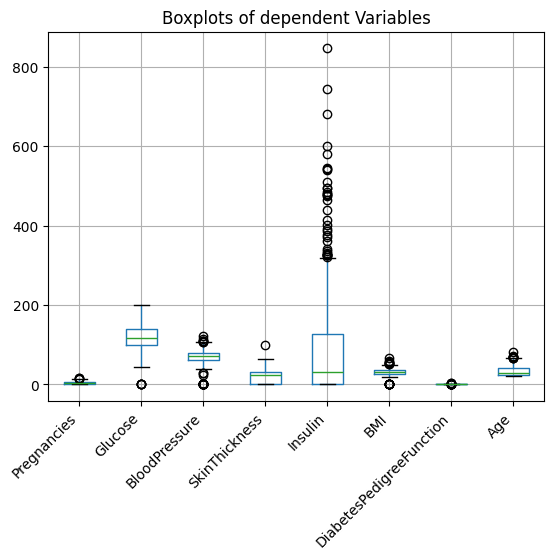

In [6]:
# Select all columns except 'Outcome'
dependent_columns = df_diabetes.drop('Outcome', axis=1)

# Create boxplots for each numerical column
dependent_columns.boxplot()
plt.title('Boxplots of dependent Variables')
plt.xticks(rotation=45, ha='right')
plt.show()

### From the boxplot above we can conclude:
### Insulin
Outliers: The minimum value is 0, and the maximum value is 846. The presence of a zero value might indicate missing data or individuals with no insulin production. The maximum value is far beyond the 75th percentile (127.25), suggesting the presence of outliers.
Distribution: The distribution of insulin values is highly skewed to the right. This is evident from the large difference between the mean (79.79) and the median (30.5), indicating that there are some extremely high values pulling the mean upward.
### Age
The age distribution in the dataset is somewhat skewed to the right, with a moderate spread of ages. This suggests that the dataset includes individuals from various age groups, with a slight overrepresentation of older individuals.
### Pregnancies
The distribution of pregnancies in the dataset is skewed to the right, with a moderate spread. This suggests that most individuals have a relatively low number of pregnancies, but there are some with a higher number of pregnancies, contributing to the skewness
### DiabetesPedigreeFunction
The DiabetesPedigreeFunction distribution in the dataset is somewhat skewed to the right, with a moderate spread of values. This suggests that the dataset includes individuals with varying levels of DiabetesPedigreeFunction, with a slight overrepresentation of individuals with higher values.

### Bivariate Analysis

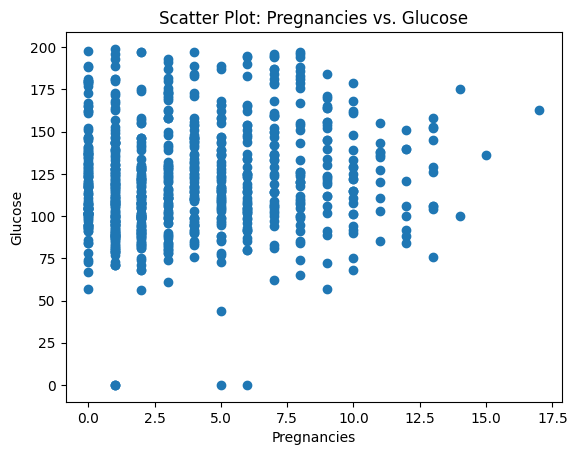

Correlation between Pregnancies and Glucose: 0.129


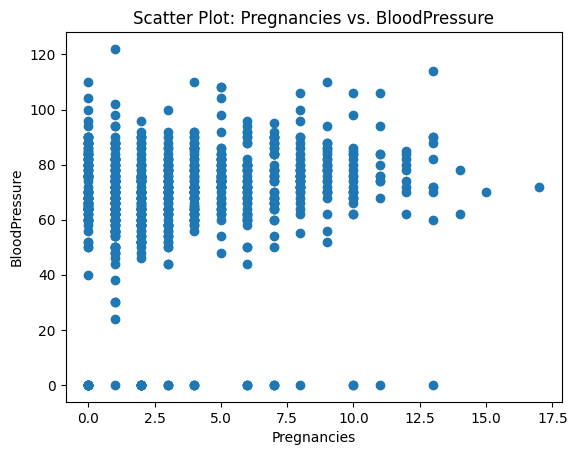

Correlation between Pregnancies and BloodPressure: 0.141


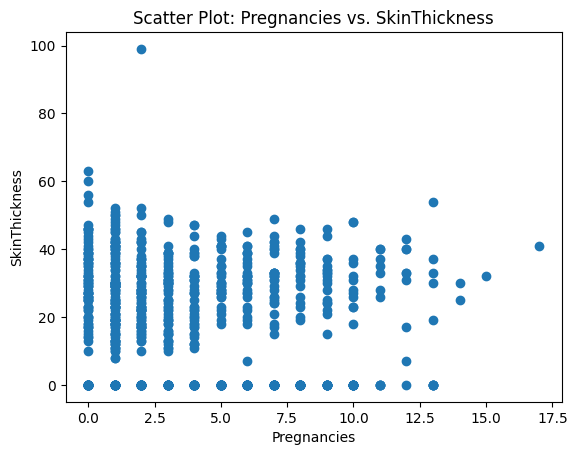

Correlation between Pregnancies and SkinThickness: -0.082


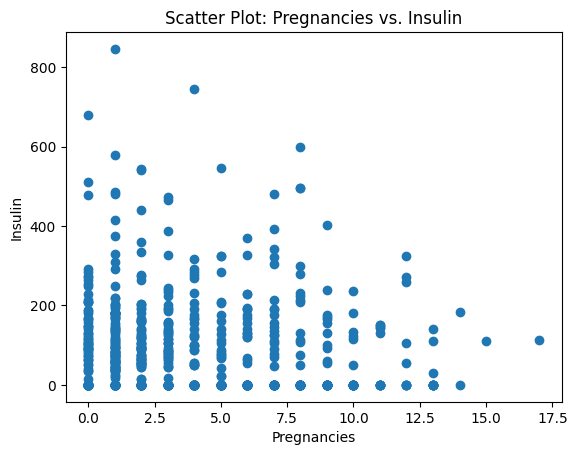

Correlation between Pregnancies and Insulin: -0.074


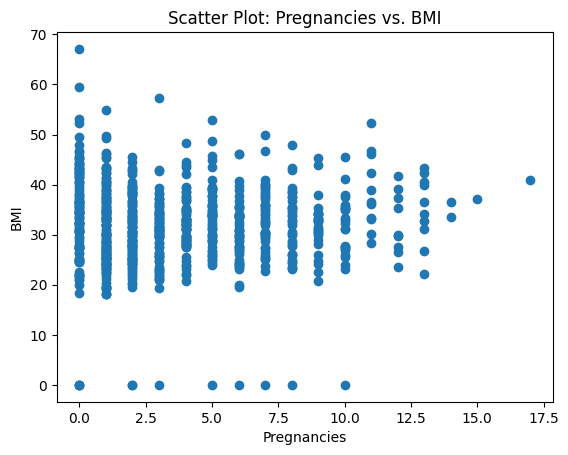

Correlation between Pregnancies and BMI: 0.018


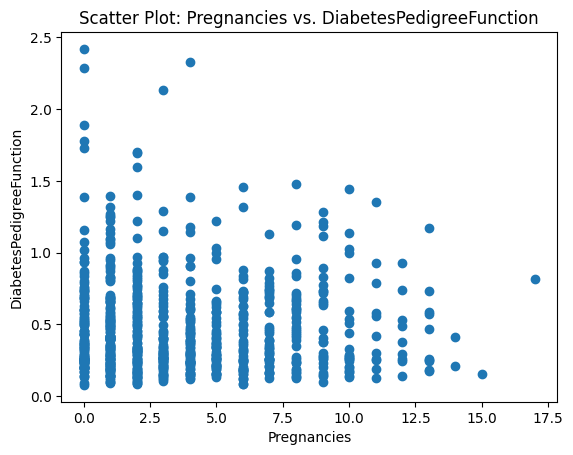

Correlation between Pregnancies and DiabetesPedigreeFunction: -0.034


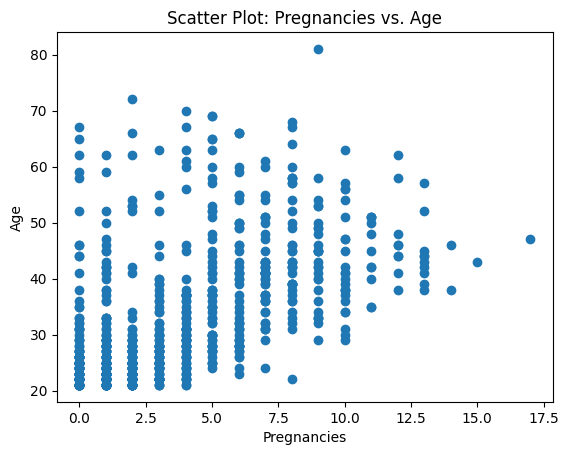

Correlation between Pregnancies and Age: 0.544


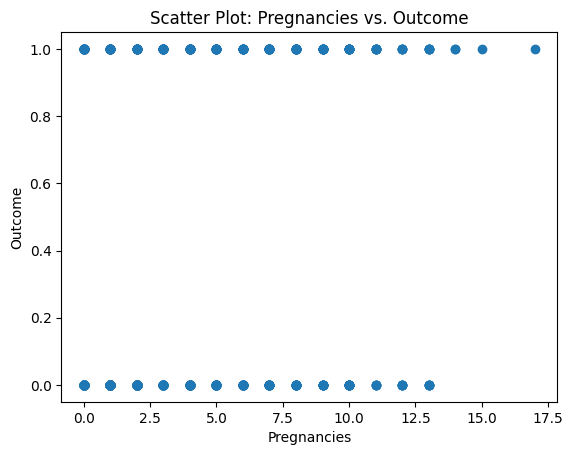

Correlation between Pregnancies and Outcome: 0.222


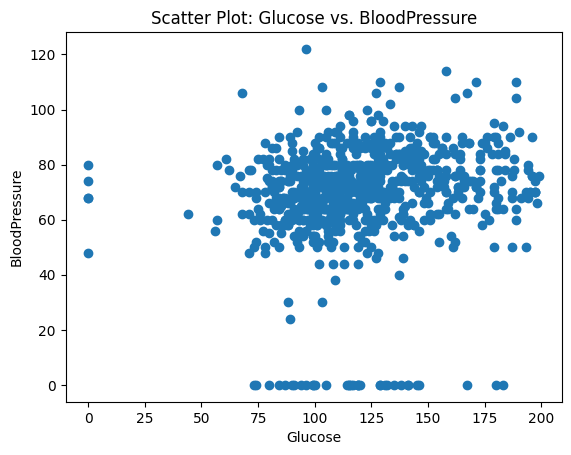

Correlation between Glucose and BloodPressure: 0.153


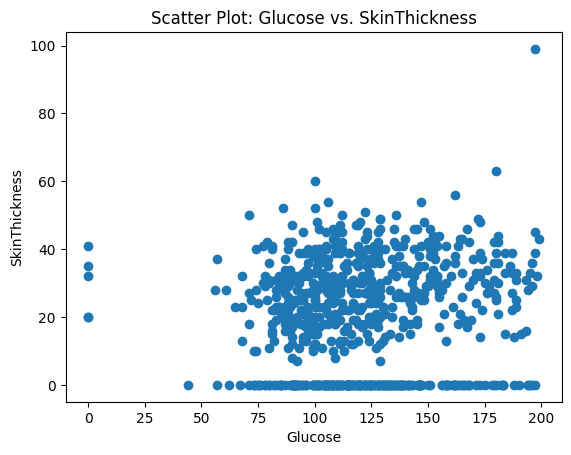

Correlation between Glucose and SkinThickness: 0.057


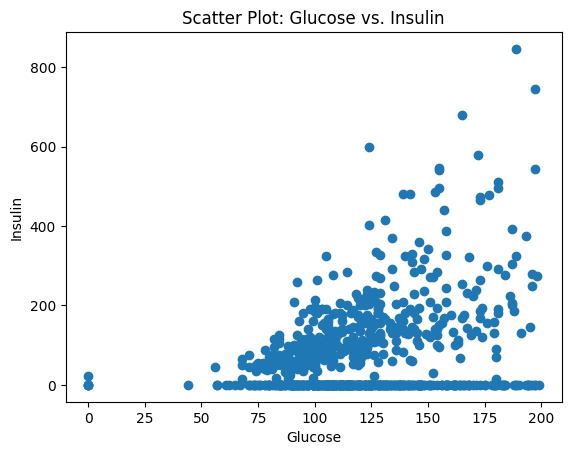

Correlation between Glucose and Insulin: 0.331


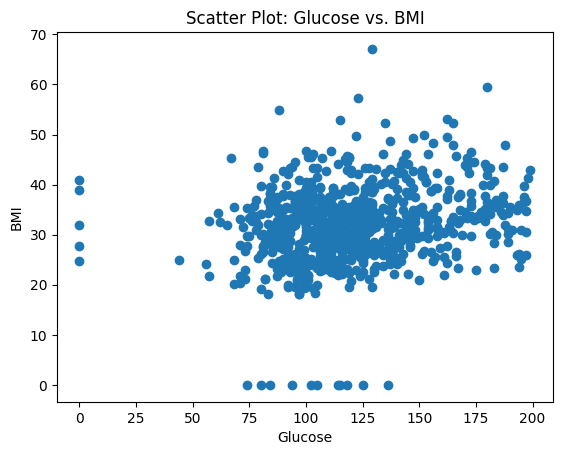

Correlation between Glucose and BMI: 0.221


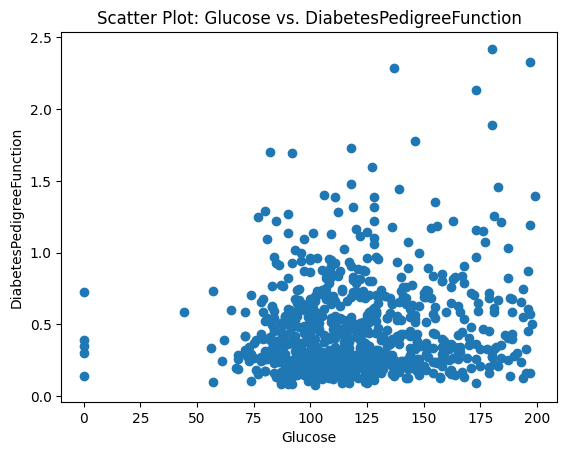

Correlation between Glucose and DiabetesPedigreeFunction: 0.137


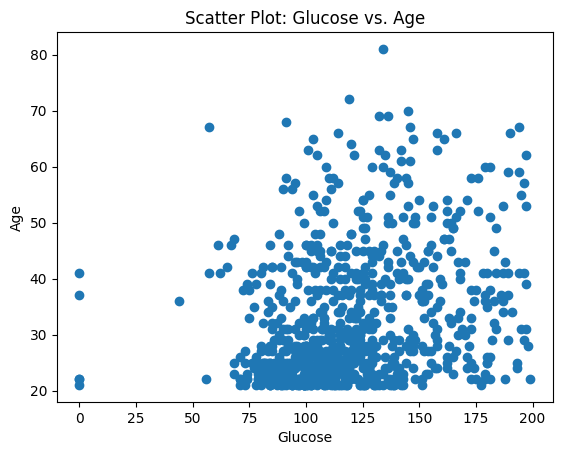

Correlation between Glucose and Age: 0.264


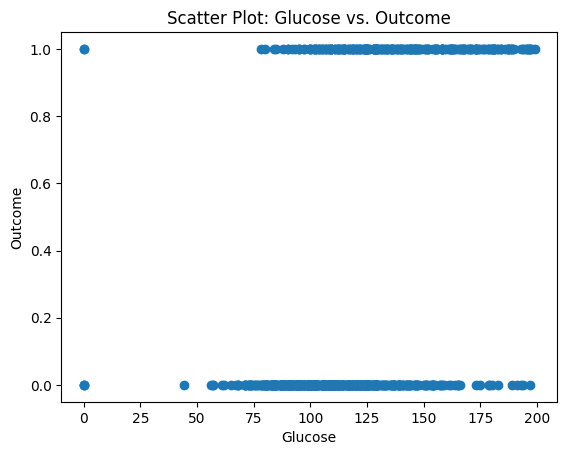

Correlation between Glucose and Outcome: 0.467


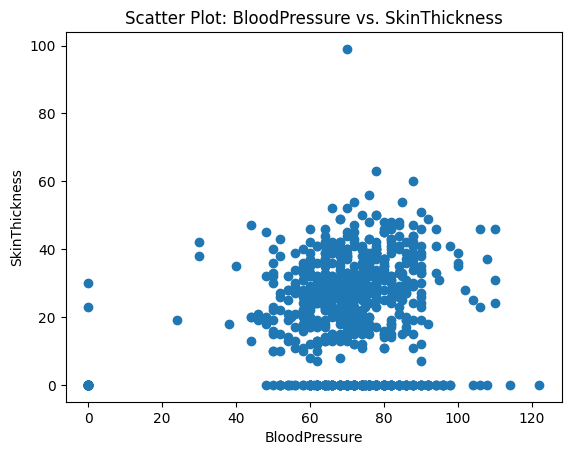

Correlation between BloodPressure and SkinThickness: 0.207


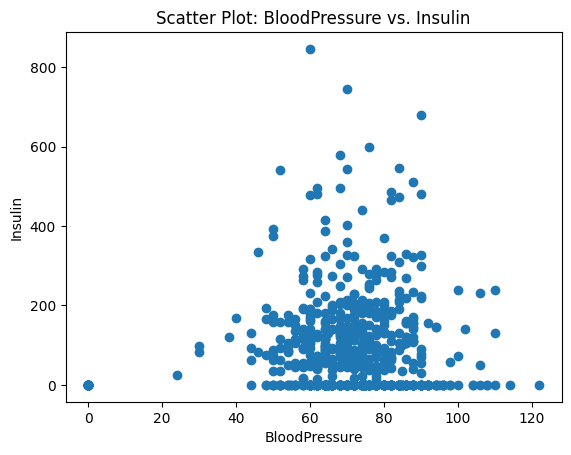

Correlation between BloodPressure and Insulin: 0.089


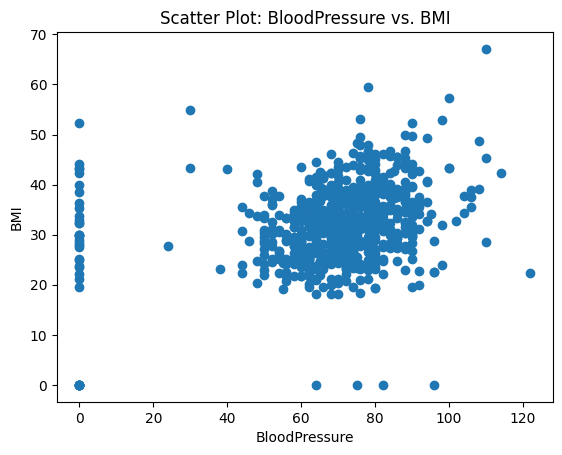

Correlation between BloodPressure and BMI: 0.282


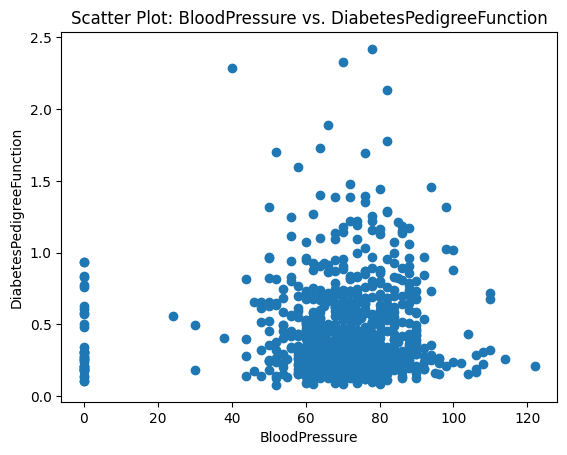

Correlation between BloodPressure and DiabetesPedigreeFunction: 0.041


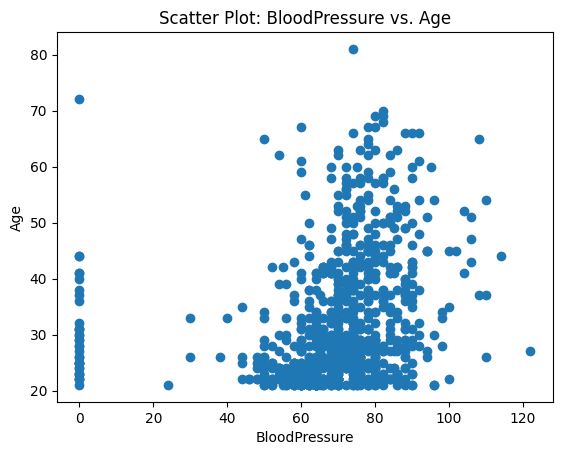

Correlation between BloodPressure and Age: 0.240


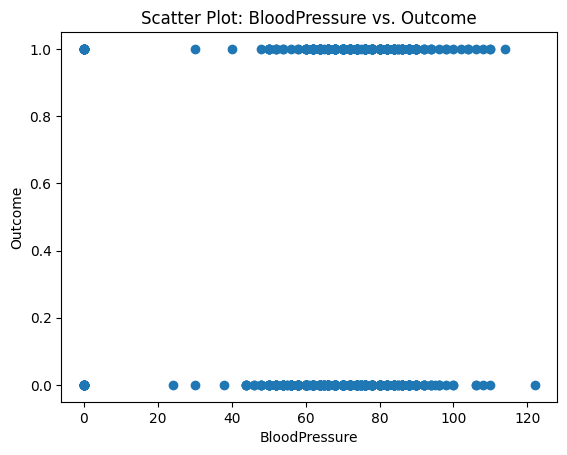

Correlation between BloodPressure and Outcome: 0.065


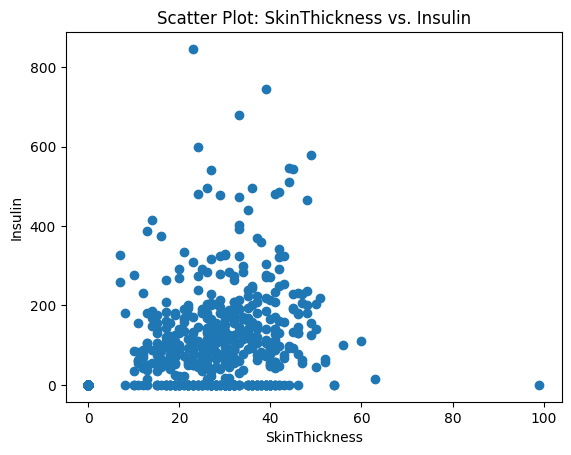

Correlation between SkinThickness and Insulin: 0.437


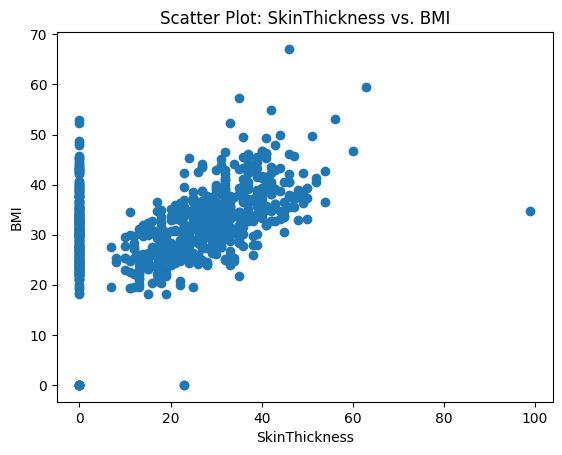

Correlation between SkinThickness and BMI: 0.393


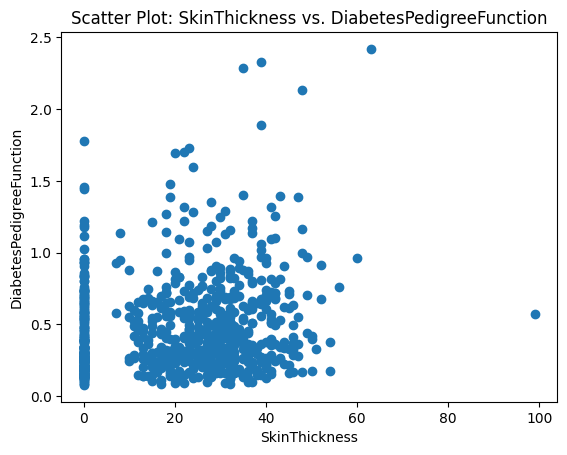

Correlation between SkinThickness and DiabetesPedigreeFunction: 0.184


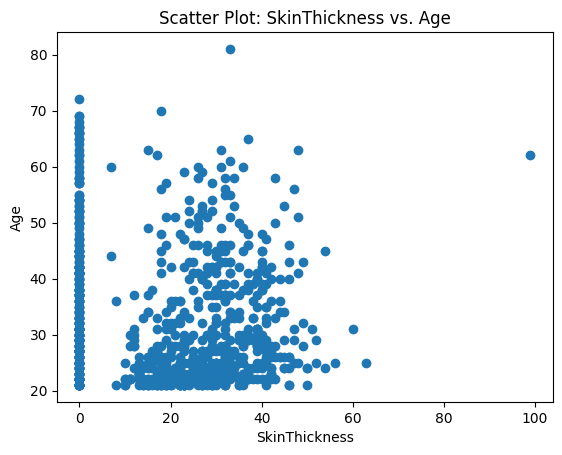

Correlation between SkinThickness and Age: -0.114


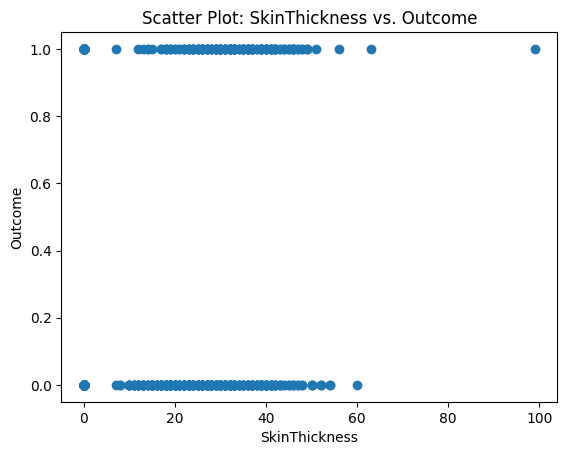

Correlation between SkinThickness and Outcome: 0.075


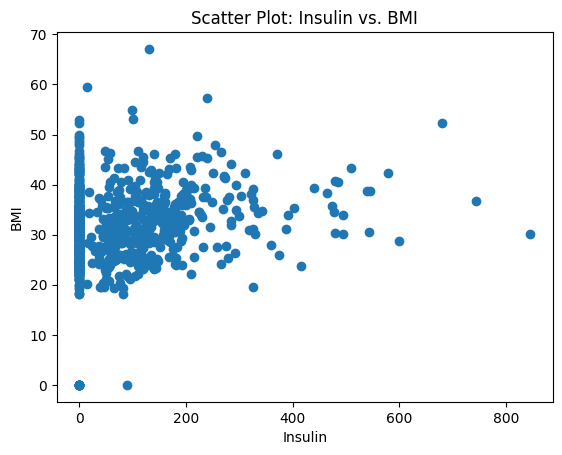

Correlation between Insulin and BMI: 0.198


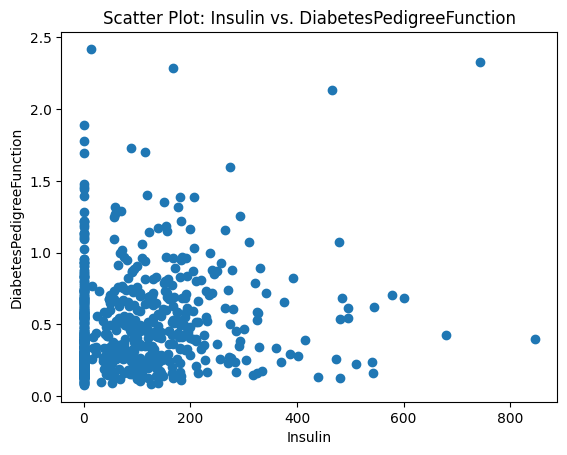

Correlation between Insulin and DiabetesPedigreeFunction: 0.185


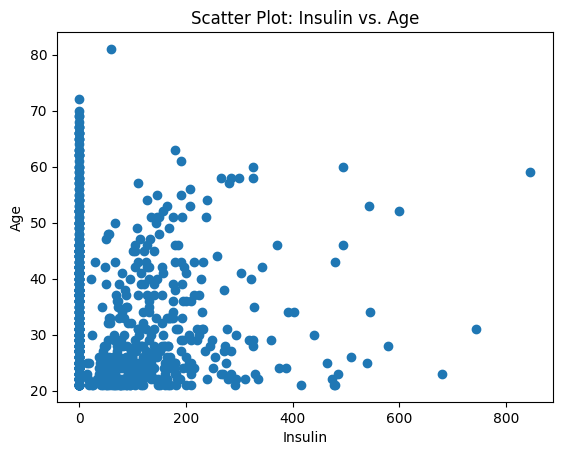

Correlation between Insulin and Age: -0.042


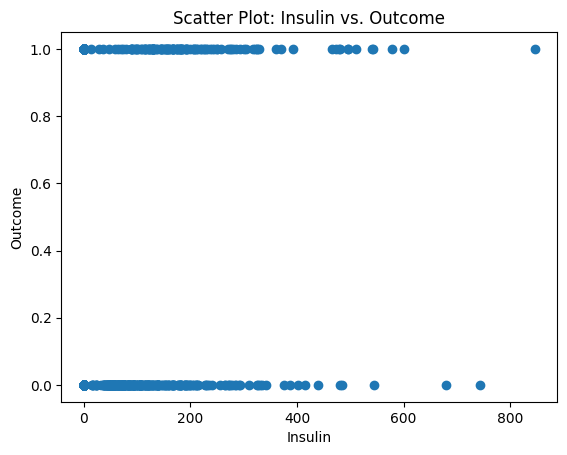

Correlation between Insulin and Outcome: 0.131


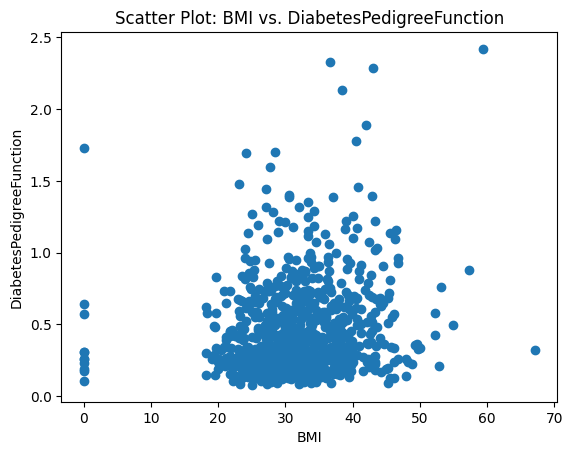

Correlation between BMI and DiabetesPedigreeFunction: 0.141


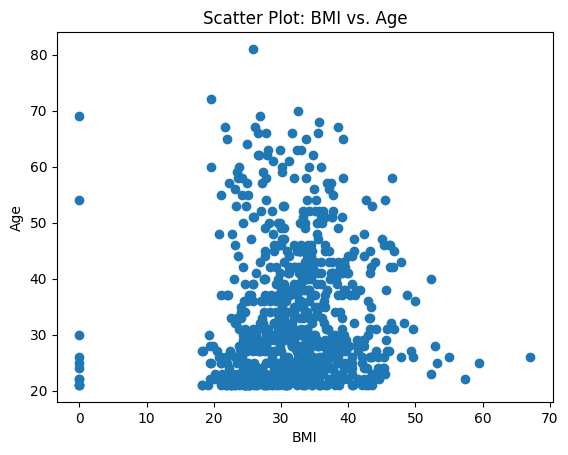

Correlation between BMI and Age: 0.036


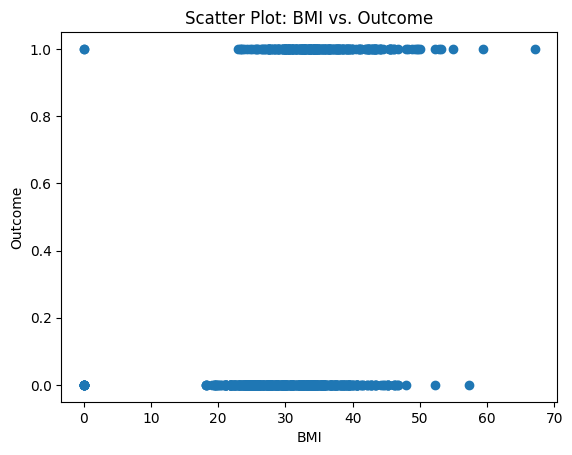

Correlation between BMI and Outcome: 0.293


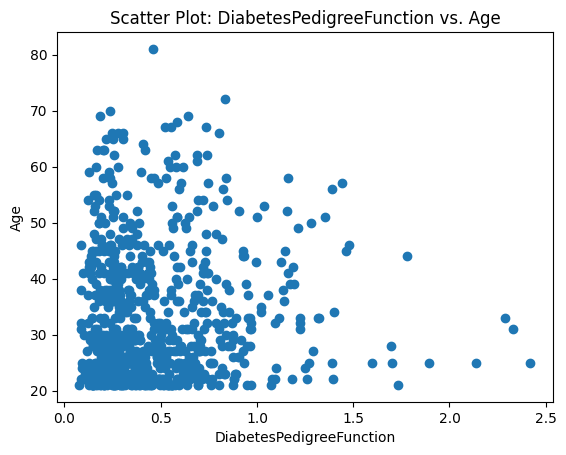

Correlation between DiabetesPedigreeFunction and Age: 0.034


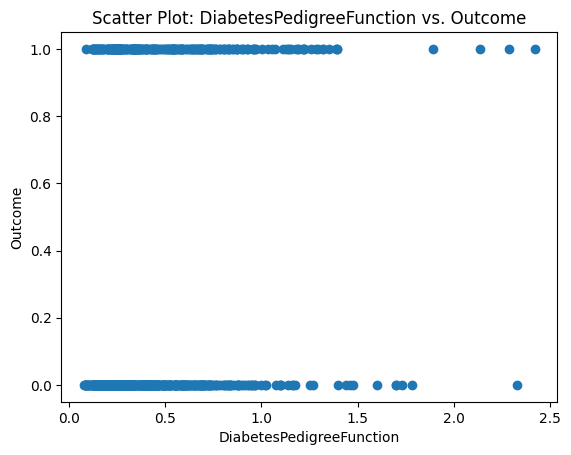

Correlation between DiabetesPedigreeFunction and Outcome: 0.174


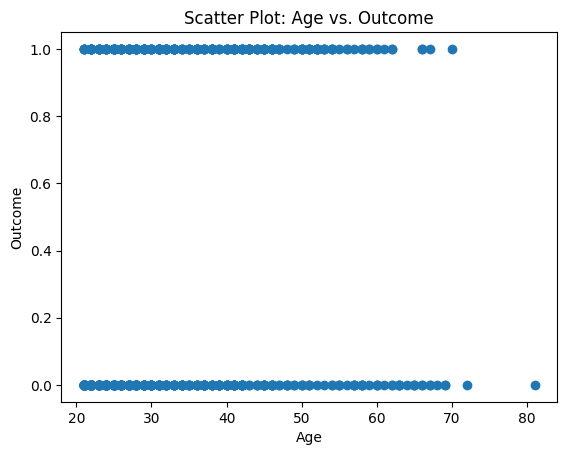

Correlation between Age and Outcome: 0.238


In [10]:
# Select numerical columns
numerical_columns = df_diabetes.select_dtypes(include=np.number).columns

# Bivariate analysis loop
for i in range(len(numerical_columns)):
    for j in range(i+1, len(numerical_columns)):
        col1 = numerical_columns[i]
        col2 = numerical_columns[j]

        # Create scatter plot
        plt.figure()
        plt.scatter(df_diabetes[col1], df_diabetes[col2])
        plt.title(f'Scatter Plot: {col1} vs. {col2}')
        plt.xlabel(col1)
        plt.ylabel(col2)
        plt.show()

        # Calculate correlation coefficient
        correlation = df_diabetes[col1].corr(df_diabetes[col2])
        print(f'Correlation between {col1} and {col2}: {correlation:.3f}')


From the above bivariate analysis i have the following insights:
*Pregnancies: The number of pregnancies has a weak positive correlation with age (0.544) and a weak positive correlation with the outcome (0.222), suggesting that older individuals and those with more pregnancies are slightly more likely to have diabetes.

*Glucose: Glucose levels have a moderate positive correlation with age (0.264) and a moderate positive correlation with the outcome (0.467), indicating that higher glucose levels are associated with an increased likelihood of diabetes.

*Blood Pressure: Blood pressure has a weak positive correlation with BMI (0.282) but a weak positive correlation with the outcome (0.065), suggesting that blood pressure may not be a strong predictor of diabetes.

*Skin Thickness: Skin thickness has a moderate positive correlation with insulin (0.437) and BMI (0.393), but a weak positive correlation with the outcome (0.075), indicating that skin thickness may not directly predict diabetes.

*Insulin: Insulin levels have a weak positive correlation with BMI (0.198) and a weak positive correlation with the outcome (0.131), suggesting that insulin levels may play a minor role in diabetes prediction.

*BMI: BMI has a weak positive correlation with diabetes pedigree function (0.141) and a weak positive correlation with the outcome (0.174), indicating that higher BMI is associated with an increased risk of diabetes.

*Diabetes Pedigree Function: Diabetes pedigree function has a weak positive correlation with age (0.034) and a weak positive correlation with the outcome (0.174), suggesting that family history may contribute to diabetes risk.

Overall, glucose levels and age appear to be the strongest predictors of diabetes, while other factors like pregnancies, blood pressure, skin thickness, insulin, BMI, and diabetes pedigree function have weaker correlations with the outcome.

# Multivariate Analysis

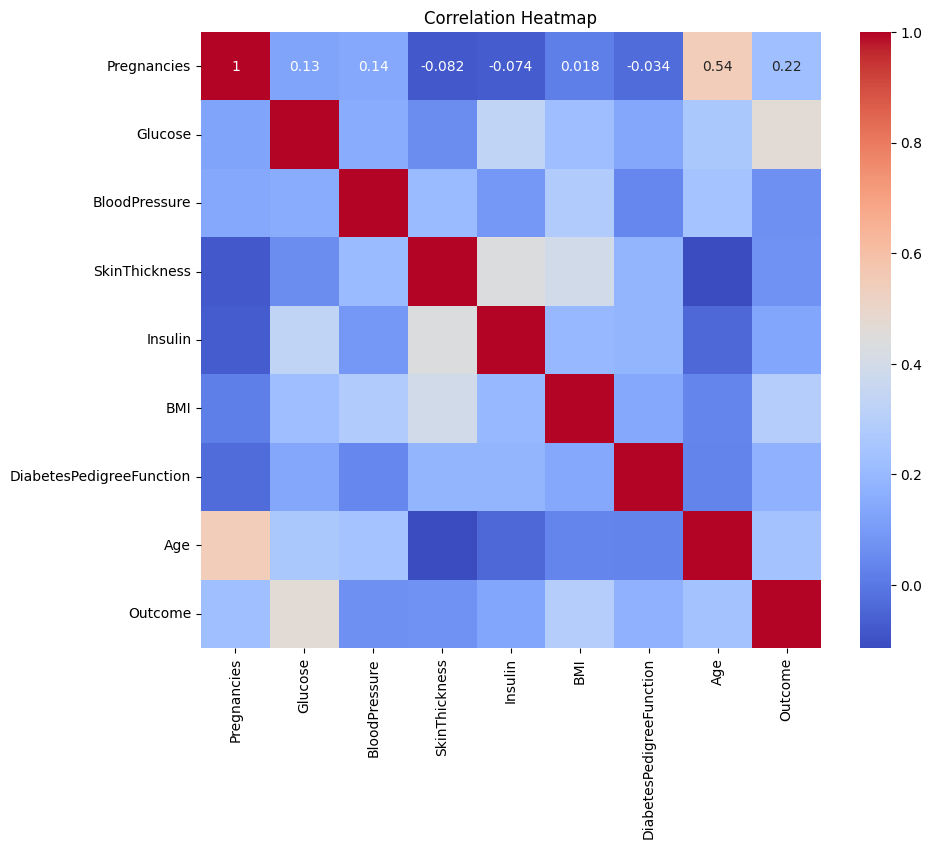

In [13]:

# Calculate correlation matrix
correlation_matrix = df_diabetes.corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

 The correlation matrix reveals that glucose levels and age are the strongest predictors of diabetes, while other factors like BMI, diabetes pedigree function, skin thickness, and insulin levels have weaker but still relevant correlations with the outcome. These findings suggest that a combination of these factors contributes to the risk of developing diabetes.

# Hypothesis test
we are using chi_square test since our targeet variable is  a bianary column

Null Hypothesis (H0): There is no significant relationship between age and the likelihood of having diabetes.

Alternative Hypothesis (H1): There is a significant relationship between age and the likelihood of having diabetes

In [15]:

# Create a contingency table of age and outcome
contingency_table = pd.crosstab(df_diabetes['Age'], df_diabetes['Outcome'])

# Perform chi-square test of independence
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f'P-value: {p:.3f}')

P-value: 0.000


A p-value of 0.000 suggests that there is a highly statistically significant relationship between age and the likelihood of having diabetes. The null hypothesis, which states that there is no relationship between age and diabetes, can be rejected with a high degree of confidence

# Answering questions with visualizations

question1:1. Prevalence of diabetes across age groups:

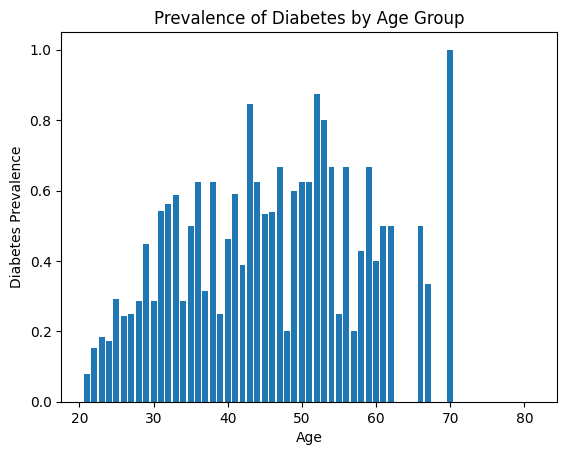

In [17]:
# Calculate diabetes prevalence by age group
df_diabetes_grouped = df_diabetes.groupby('Age')['Outcome'].mean()

# Create a bar chart of diabetes prevalence by age group
plt.bar(df_diabetes_grouped.index, df_diabetes_grouped.values)
plt.xlabel('Age')
plt.ylabel('Diabetes Prevalence')
plt.title('Prevalence of Diabetes by Age Group')
plt.show()

The prevalence of diabetes increases with age, indicating that older individuals are more likely to have diabetes

Question2:2. Correlation between age and diabetes probability

Correlation between age and diabetes status: 0.238


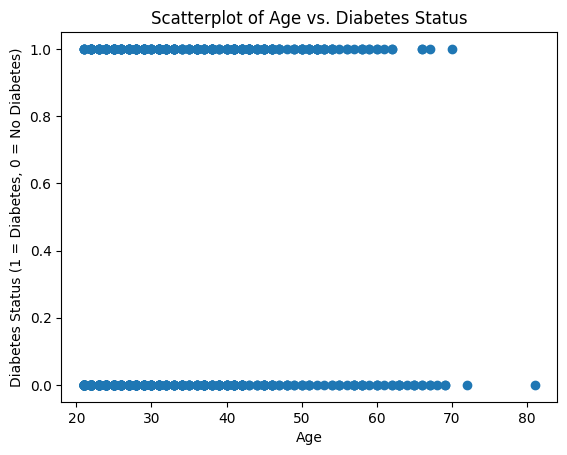

In [16]:
# Calculate correlation coefficient between age and diabetes status
correlation = df_diabetes['Age'].corr(df_diabetes['Outcome'])
print(f'Correlation between age and diabetes status: {correlation:.3f}')

# Create a scatterplot of age versus diabetes status
plt.scatter(df_diabetes['Age'], df_diabetes['Outcome'])
plt.xlabel('Age')
plt.ylabel('Diabetes Status (1 = Diabetes, 0 = No Diabetes)')
plt.title('Scatterplot of Age vs. Diabetes Status')
plt.show()

There is a positive correlation between age and the probability of having diabetes, suggesting that as age increases, the likelihood of having diabetes also increases.

Question3:Relationship between age and diabetes after controlling for other factors

In [21]:
# Calculate partial correlation between age and outcome, controlling for BMI, glucose, and diabetes pedigree function
partial_correlation = pg.partial_corr(df_diabetes, x='Age', y='Outcome', covar=['BMI', 'Glucose', 'DiabetesPedigreeFunction'])
print(f'Partial correlation between age and outcome: {partial_correlation["r"].values[0]:.3f}')

Partial correlation between age and outcome: 0.145


 Age remains a significant predictor of diabetes even after controlling for other factors like BMI, glucose levels, and family history. This implies that age is an independent risk factor for diabetes.

Question4:Factors influencing the relationship between glucose levels and diabetes

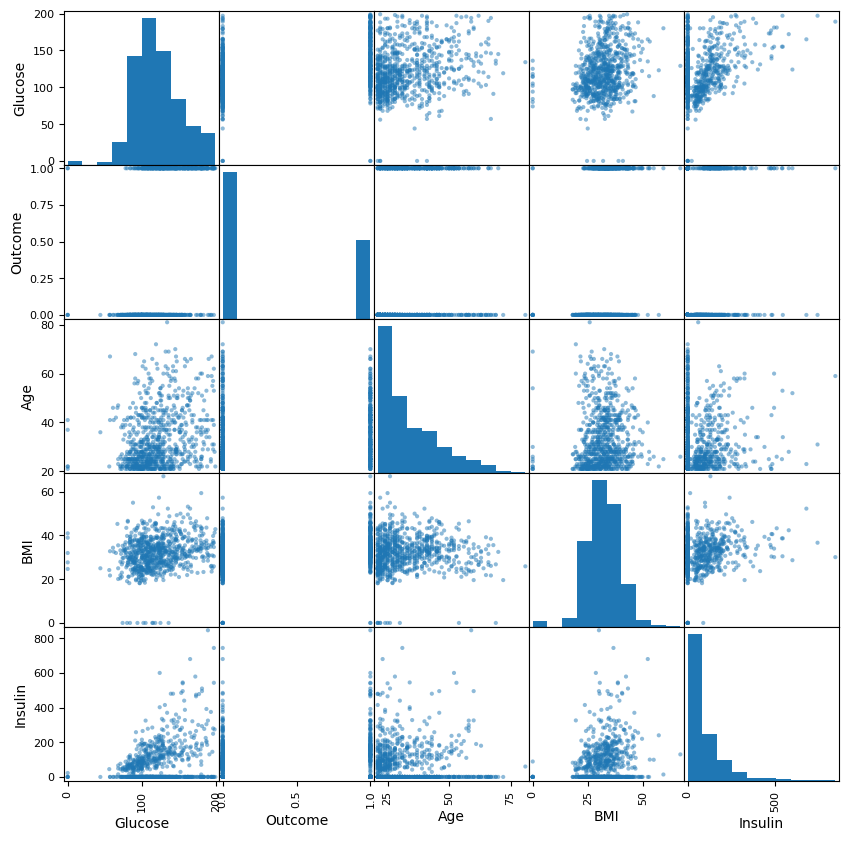

In [19]:

# Create a scatterplot matrix of glucose levels, diabetes status, age, BMI, and insulin levels
pd.plotting.scatter_matrix(df_diabetes[['Glucose', 'Outcome', 'Age', 'BMI', 'Insulin']], figsize=(10, 10))
plt.show()

The scatterplot matrix reveals that glucose levels are strongly associated with diabetes status, and this relationship is not significantly affected by age, BMI, or insulin levels.

Question5:Distribution of glucose levels by diabetes status

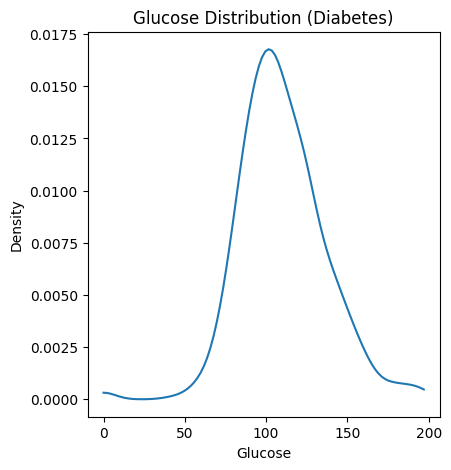

In [27]:

# Create density plots of glucose levels for individuals with and without diabetes
df_diabetes_diabetes = df_diabetes[df_diabetes['Outcome'] == 1]
df_diabetes_nodiabetes = df_diabetes[df_diabetes['Outcome'] == 0]

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Glucose Distribution (Diabetes)')
plt.xlabel('Glucose')
plt.ylabel('Density')

# Use gaussian_kde from scipy.stats to generate density data
density_nodiabetes = gaussian_kde(df_diabetes_nodiabetes['Glucose'])
x_vals = np.linspace(df_diabetes_nodiabetes['Glucose'].min(), df_diabetes_nodiabetes['Glucose'].max(), 100)
density_data_nodiabetes = density_nodiabetes(x_vals)

plt.plot(x_vals, density_data_nodiabetes)

plt.show()

 Individuals with diabetes tend to have higher glucose levels compared to those without diabetes. The density plots show a clear difference in the distribution of glucose levels between the two groups.

# Model building

We are creating two model